In [15]:
from coffea import processor
from coffea.analysis_tools import PackedSelection
from coffea.nanoevents import NanoAODSchema, NanoEventsFactory
import awkward as ak
import hist

In [2]:
events = NanoEventsFactory.from_root(
    "/home/prayag/Coffea/data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root",
    schemaclass=NanoAODSchema,
    metadata={
        "dataset":"MET_Run2018"
    }
).events()

In [3]:
events

<NanoEventsArray [<event 302448:1010:1099907587>, ... ] type='297347 * event'>

In [4]:
events.Muon.pt

<Array [[], [], [], ... 168], [3.18], []] type='297347 * var * float32[parameter...'>

In [5]:
events.MET.pt

<Array [26.4, 60.3, 79.1, ... 20.4, 93.3, 46.8] type='297347 * float32[parameter...'>

In [6]:
PFCand = events.Muon.isPFcand
RelIso = events.Muon.pfRelIso04_all < 0.15
Eta = abs(events.Muon.eta) < 2.4
Pt = events.Muon.pt > 30.0
Id = events.Muon.tightId 

final_cut = PFCand & RelIso & Eta & Pt & Id

In [8]:
all_tight = events.Muon[final_cut]
all_tight

<MuonArray [[], [], [], [], ... [Muon], [], []] type='297347 * var * muon'>

In [11]:
one_tight_cut = ak.num(all_tight , axis=1) == 1
one_tight_cut

<Array [False, False, False, ... False, False] type='297347 * bool'>

In [14]:
goodevents = events[one_tight_cut]
goodevents

<NanoEventsArray [<event 302448:1010:1100030073>, ... ] type='226 * event'>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd22362a140>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

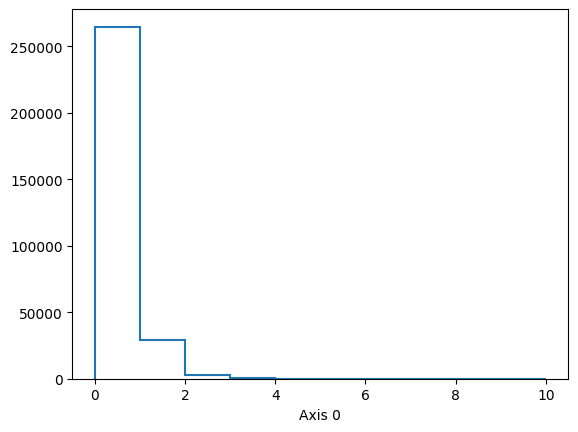

In [16]:
hist.Hist.new.Reg(10,0,10).Double().fill(ak.num(events.Muon.pt)).plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd230404340>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

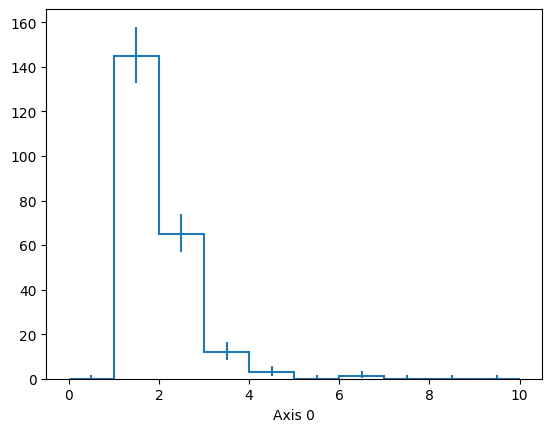

In [17]:
hist.Hist.new.Reg(10,0,10).Double().fill(ak.num(goodevents.Muon.pt)).plot()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd21f5b52a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

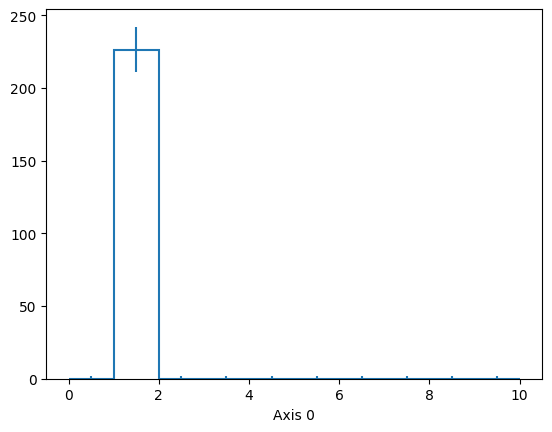

In [22]:
ha = events.Muon[final_cut]
print(ak.num(ha))
singles = ha[ak.num(ha)==1]
print(ak.num(singles))
hist.Hist.new.Reg(10,0,10).Double().fill(ak.num(singles.pt)).plot()

In [ ]:
final_cut = PFCand & RelIso & Eta & Pt & Id
all_tight = events.Muon[final_cut]
one_tight_cut = ak.num(all_tight , axis=1) == 1
goodevents = events[one_tight_cut]
# ha = events.Muon[final_cut]
# singles = ha[ak.num(ha)==1] 